
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each having a variance of 0.3. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.
2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Write a function called kNNClassify that accepts training data, a test point, and the hyperparameter 'k' as input and returns the label of the test point. Pick a reasonable 'k' for this experiment. Use "kNNClassify" function to generate the labels for the test data generated in part(a) of this PA. Compare the predicted labels with the original labels and calculate the portion of test data points that are correctly classified. In other words, calculate the accuracy of the classifier.
3. Create a visual representation of the predictions by plotting all data points in a 2D plane. Assign green and blue colors to represent class 1 and class 2, respectively. For test data points that are misclassified, assign the color red.
4. Generate and visualize the decision regions of 2D plane that are associated with each class, for a given classifier. Decision regions can be created by classifying all the data points in the 2D grid and assigning class-specific colors to them.

<b> Part(c): Parameter selection: What is good value for k? - </b> One intuitive approach to determine the optimal 'k' is through cross-validation. During cross-validation, a ρ% portion of the training dataset is utilized as the validation dataset, and the model's performance is assessed on this validation set with various 'k' values. Through these cross-validation experiments, we select the 'k' that yields the best performance on the validation data.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
if there is an improvement on the classification error over the result of Part 2.

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or adding noise by randomly flipping the labels on the training set.

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> : This part will not be graded. However, you are recommended to work on it to get exposure to the practical applications of the KNN classifier.

1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector. NOTE: If you had already written a kNNClassify for multi class classification in part1 (b), you are free to use it.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%.
3. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
4. Apply these values to evaluate the performance on the test dataset.
5. Create a confusion matrix to understand the most confused classes (digits).
6. Suggest alternate ways to improve the performance.



In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
from sklearn.datasets import fetch_openml

360
120
240
(array([-1.,  1.]), array([60, 60]))
(array([-1.,  1.]), array([120, 120]))


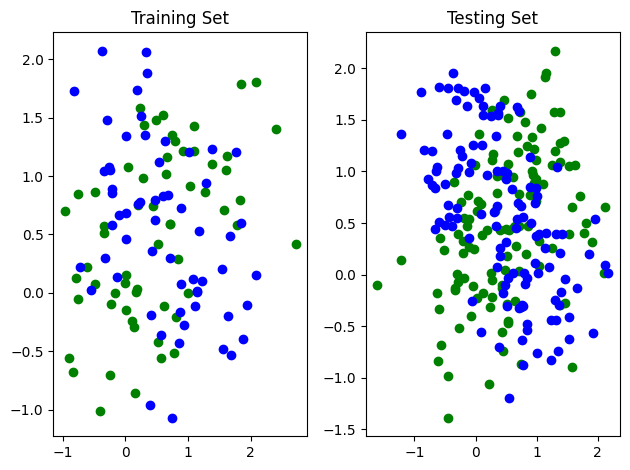

In [ ]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1=(0,0)
mean2=(0,1)
mean3=(1,0)
mean4=(1,1)
cov=[[0.3, 0], [0, 0.3]]
num = 90
#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
Sample1 = np.random.multivariate_normal(mean1, cov, num)
Sample2 = np.random.multivariate_normal(mean2, cov, num)
Sample3 = np.random.multivariate_normal(mean3, cov, num)
Sample4= np.random.multivariate_normal(mean4, cov, num)
print(len(Sample1)+len(Sample2)+len(Sample3)+len(Sample4))
training=np.concatenate([Sample1[:30],Sample2[:30],Sample3[:30],Sample4[:30]])
testing=np.concatenate([Sample1[30:90],Sample2[30:90],Sample3[30:90],Sample4[30:90]])
print(len(training))
print(len(testing))
#Generate training data
Sample1_train=training[:30]
Sample2_train=training[30:60]
Sample3_train=training[60:90]
Sample4_train=training[90:120]
X_Class1_train=np.concatenate([Sample1_train,Sample4_train],axis=0)
Y_Class1_train=np.ones(60)
# print(np.unique(Y_Class1_train, return_counts=True))
X_Class2_train=np.concatenate([Sample2_train,Sample3_train],axis=0)
Y_Class2_train=-np.ones(60)
# print(np.unique(Y_Class2_train, return_counts=True))
X_train=np.concatenate([X_Class1_train,X_Class2_train])
Y_train=np.concatenate([Y_Class1_train,Y_Class2_train])
print(np.unique(Y_train, return_counts=True))
#Generate testing data
Sample1_test=testing[:60]
Sample2_test=testing[60:120]
Sample3_test=testing[120:180]
Sample4_test=testing[180:240]
X_Class1_test=np.concatenate([Sample1_test,Sample4_test],axis=0)
Y_Class1_test=np.ones(120)
# print(np.unique(Y_Class1_test, return_counts=True))
X_Class2_test=np.concatenate([Sample2_test,Sample3_test],axis=0)
Y_Class2_test=-np.ones(120)
# print(np.unique(Y_Class2_test, return_counts=True))
X_test=np.concatenate([X_Class1_test,X_Class2_test])
Y_test=np.concatenate([Y_Class1_test,Y_Class2_test])
print(np.unique(Y_test, return_counts=True))
#Visualize the data using plt.scatter() function

plt.subplot(1, 2, 1)
plt.scatter(X_Class1_train[:, 0], X_Class1_train[:, 1], color='green', label='Class1_Training')
plt.scatter(X_Class2_train[:, 0], X_Class2_train[:, 1], color='blue', label='Class2_Training')
plt.title('Training Set')

plt.subplot(1, 2, 2)
plt.scatter(X_Class1_test[:, 0], X_Class1_test[:, 1], color='green', label='Class1_Testing')
plt.scatter(X_Class2_test[:, 0], X_Class2_test[:, 1], color='blue', label='Class_2_Testing')
plt.title('Testing Set')

plt.tight_layout()
plt.show()

Accuracy : 62.08%


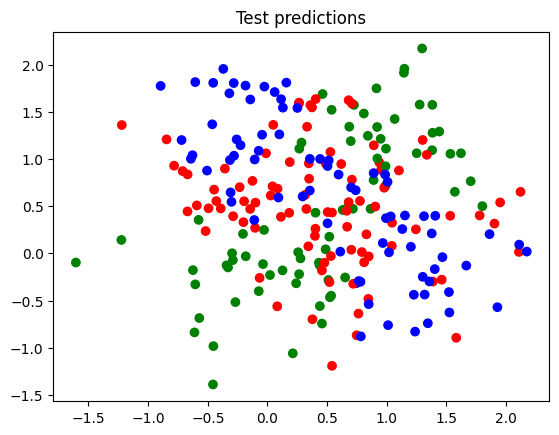

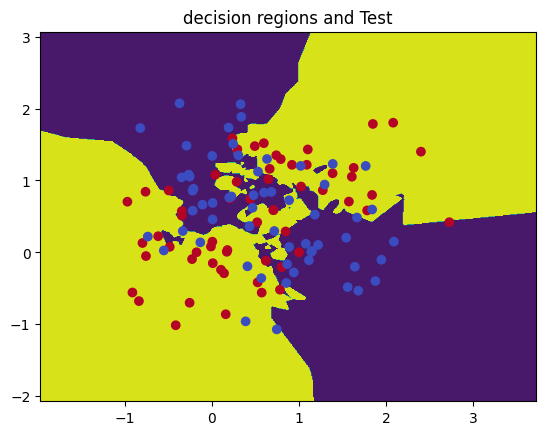

In [ ]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
def kNNClassify(X_train,Y_train,X_test,k):
  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
  #Outputs : Predicted class
  '''
  #Algorithm
  #1.Initialize a list to store the predictions of our algorithm
  #2.Iterate through the test points
  #3.    Initialize a list to store the distances of test point with each of the training point.
  #4.    Iterate through the training points
  #5.        Compute the distance between the test and train point
  #6.    Find out the k nearest neighbours
  #7.    Get the most frequent label of k nearest neighbours
  #8.Return the predictions
  #Fill the code
  predictions = []
  for test_point in X_test:
      distances = []
      for i, train_point in enumerate(X_train):
          distance = np.linalg.norm(test_point - train_point,ord=2)
          distances.append((distance, Y_train[i]))
      distances.sort(key=lambda x: x[0])
      k_nearest_neighbors = distances[:k]
      labels = [neighbor[1] for neighbor in k_nearest_neighbors]
      # Get the most frequent label
      prediction = max(set(labels), key=labels.count)
      predictions.append(prediction)
  return predictions
#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
  '''
  #Inputs : Ground truth and predicted labels
  #Outputs : Portion of data points that are correctly classified, i.e., accuracy
  '''
  #Algorithm
  #1. Iterate through the total number of predictions
  #2.     Verify wheter the ground truth matches with the predictions
  #3. Compute and return the percentage of the correctly classified points
  #Fill the code
  correct_count = 0
  total_predictions = len(true)

  for i in range(total_predictions):
      if true[i] == pred[i]:
          correct_count += 1

  accuracy_per = (correct_count / total_predictions)

  return accuracy_per
k = int(math.sqrt(len(training))/2)
Y_pred = kNNClassify(X_train, Y_train, X_test, k)
prev_acc = KNNAccuracy(Y_test, Y_pred)
print(f"Accuracy : {prev_acc:.2%}")
#Create a visual representation of predictions
colors = ['green' if label == 1 else 'blue' for label in Y_test]
misclassified = Y_test != Y_pred
colors_misclassified = ['red' if misclassified[i] else colors[i] for i in range(len(Y_test))]
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors_misclassified)
plt.title('Test predictions')
plt.show()
#Generate and visualize the decision regions and overlay the test points
h = 0.01
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kNNClassify(X_train, Y_train,np.c_[xx.ravel(), yy.ravel()],k)
Z = np.array(Z).reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm)
plt.title('decision regions and Test')
plt.show()

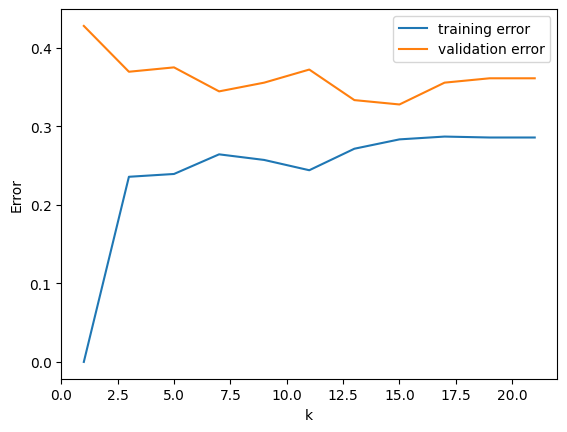

Best Validation Error: 0.3278
Best k value: 15
Accuracy of Prev k value : 63.33%
Accuracy of After k value: 69.17%
Increased accuracy is :5.83%


In [ ]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,numrep,rho,X_train, Y_train):
  #Iterate through range of k values
  #Iterate through number of repetations
  #Hold out rho fraction of training data in each repetition.
  #Return errors on training and validation data
  training_errors = []
  validation_errors = []
  for k in k_range:
      training_error_sum = 0
      validation_error_sum = 0
      for j in range(numrep):
          combined_data = list(zip(X_train, Y_train))
          random.shuffle(combined_data)
          split_index = int(len(combined_data) * (1 - rho))
          train_data, val_data = np.array([point[0] for point in combined_data[:split_index]]), np.array([point[0] for point in combined_data[split_index:]])
          train_labels, val_labels = np.array([point[1] for point in combined_data[:split_index]]), np.array([point[1] for point in combined_data[split_index:]])
          Y_pred_train = kNNClassify(train_data, train_labels, train_data, k)
          Y_pred_val = kNNClassify(train_data, train_labels, val_data, k)
          training_error = 1 - KNNAccuracy(train_labels, Y_pred_train)
          validation_error = 1 - KNNAccuracy(val_labels, Y_pred_val)
          training_error_sum += training_error
          validation_error_sum += validation_error
      avg_training_error = training_error_sum / numrep
      avg_validation_error = validation_error_sum / numrep
      training_errors.append(avg_training_error)
      validation_errors.append(avg_validation_error)
  return training_errors, validation_errors
#Plot training and validation errors for different values of k
k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
num_repetitions = 10
holdout_fraction = 0.3
training_errors, validation_errors = holdoutCVkNN(k, num_repetitions, holdout_fraction,X_train, Y_train)
plt.plot(k, training_errors, label='training error')
plt.plot(k, validation_errors, label='validation error')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()
#what is the best value for k?
min_valerror=min(validation_errors)
print(f"Best Validation Error: {min_valerror:.4f}")
best_k=(2*(validation_errors.index(min_valerror)))+1
print(f"Best k value: {best_k}")

#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).
Y_pred = kNNClassify(X_train, Y_train, X_test, best_k)
acc = KNNAccuracy(Y_test, Y_pred)
print(f"Accuracy of Prev k value : {prev_acc:.2%}")
print(f"Accuracy of After k value: {acc:.2%}")
print(f"Increased accuracy is :{(acc-prev_acc):.2%}")

Accuracy for 200 size : 65.83%
Accuracy for 400 size : 69.58%
Accuracy for 800 size : 68.33%
Accuracy for 1200 size : 66.67%


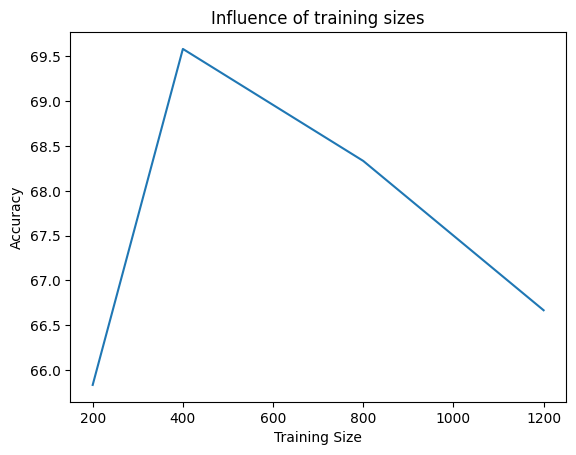

5
(array([-1.,  1.]), array([584, 616]))
0.6833333333333333
(array([-1.,  1.]), array([584, 616]))
0.6083333333333333
(array([-1.,  1.]), array([578, 622]))
0.5125
(array([-1.,  1.]), array([597, 603]))
0.4791666666666667
(array([-1.,  1.]), array([617, 583]))
0.5333333333333333


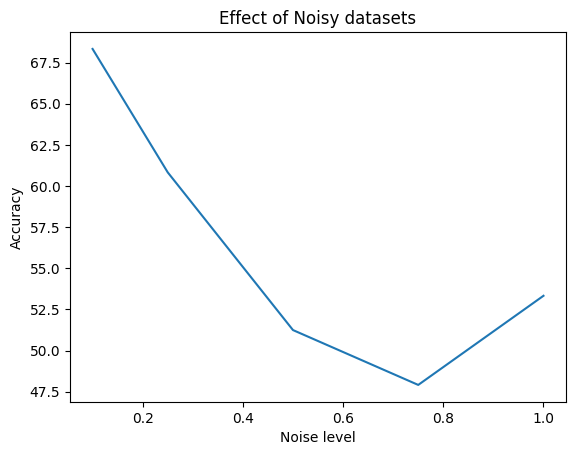

In [ ]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases
def influence_of_training_size(train_size,k_value):
    accuracies = []
    datapoints=int(train_size/4)
    # print(datapoints)
    Sample1_train = np.random.multivariate_normal(mean1, cov, datapoints)
    Sample2_train = np.random.multivariate_normal(mean2, cov,datapoints)
    Sample3_train = np.random.multivariate_normal(mean3, cov, datapoints)
    Sample4_train= np.random.multivariate_normal(mean4, cov, datapoints)
    # print(len(Sample1_train)+len(Sample2_train)+len(Sample3_train)+len(Sample4_train))
    training= np.concatenate([Sample1_train,Sample2_train,Sample3_train,Sample4_train])
    # print(len(training))
    X_Class1_train=np.concatenate([Sample1_train,Sample4_train],axis=0)
    Y_Class1_train=np.ones(int(datapoints*2))
    # print(np.unique(Y_Class1_train, return_counts=True))
    X_Class2_train=np.concatenate([Sample2_train,Sample3_train],axis=0)
    Y_Class2_train=-np.ones(int(datapoints*2))
    # print(np.unique(Y_Class2_train, return_counts=True))
    X_train=np.concatenate([X_Class1_train,X_Class2_train])
    Y_train=np.concatenate([Y_Class1_train,Y_Class2_train])
    # print(np.unique(Y_train, return_counts=True))
    # Y_pred_test = kNNClassify(X_train, Y_train, X_test, k_value)
    # accuracy_test = KNNAccuracy(Y_test, Y_pred_test)
    # accuracies.append(accuracy_test)
    # print(f"For training size {train_size}, Test Set Accuracy: {accuracy_test:.2%}")
    return X_train,Y_train
# Usage examples
train_sizes = [200, 400, 800, 1200]  # Adjust as needed
# Evaluate the influence of training size on accuracy
best_acc=[]
for i in (train_sizes):
  k_value = int((math.sqrt(i))/2)
  k_range=[]
  X_train1,Y_train1=influence_of_training_size(i,k_value) #random k for initial evaluation process
  for j in range(1,k_value,2):
    k_range.append(j)
  num_repetitions = 10
  holdout_fraction = 0.3
  # print(k_range)
  training_errors, validation_errors = holdoutCVkNN(k_range, num_repetitions, holdout_fraction,X_train1, Y_train1)
  #what is the best value for k?
  min_valerror=min(validation_errors)
  # print(f"Best Validation Error: {min_valerror:.4f}")
  best_k=(2*(validation_errors.index(min_valerror)))+1
  # print(f"Best k value : {best_k}")
  Y_pred = kNNClassify(X_train1, Y_train1, X_test, best_k)
  acc = KNNAccuracy(Y_test, Y_pred)
  best_acc.append(acc*100)
  print(f"Accuracy for {i} size : {acc:.2%}")
plt.plot(train_sizes,best_acc)
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Influence of training sizes')
plt.show()
#Experiments with more difficult data set.
''' Testing on Difficult Dataset by Flipping the labels of the data'''
def flip_labels(y, noise_level):
    flipped_indices = np.random.choice(len(y), size=int(noise_level * len(y)), replace=True)
    y[flipped_indices] *= -1
    return y
n_acc=[]
k=int(math.sqrt(len(training))/2)
print(k)
noise=[0.1,0.25,0.5,0.75,1]
for i in (noise):
  best_acc=[]
  Y_noise=flip_labels(Y_train,i)
  print(np.unique(Y_noise, return_counts=True))
  Y_pred = kNNClassify(X_train, Y_noise, X_test, k)
  acc = KNNAccuracy(Y_test, Y_pred)
  print(acc)
  n_acc.append((acc*100))
  # print(f"Accuracy of Prev k value : {acc:.2%}")
plt.plot(noise,n_acc)
plt.xlabel('Noise level')
plt.ylabel('Accuracy')
plt.title('Effect of Noisy datasets')
plt.show()

#How would you now answer the question "what is the best value for k"?
ans. Minimum validation error can get the best value for k

#What is Effect of rho and number repetations on k

ans. A larger holdout fraction provides a more test data of the model, as it is validated on a larger portion of unseen data.
Increasing the number of repetitions averages out the variability introduced by different random splits. This averaging process contributes to a more stable and reliable estimate of model performance.
Larger rho and larger number repetations can get optimal k value but until the thresshold limit.Splitting over the limit of training data available, potentially leading to overfitting and increased error on unseen data.


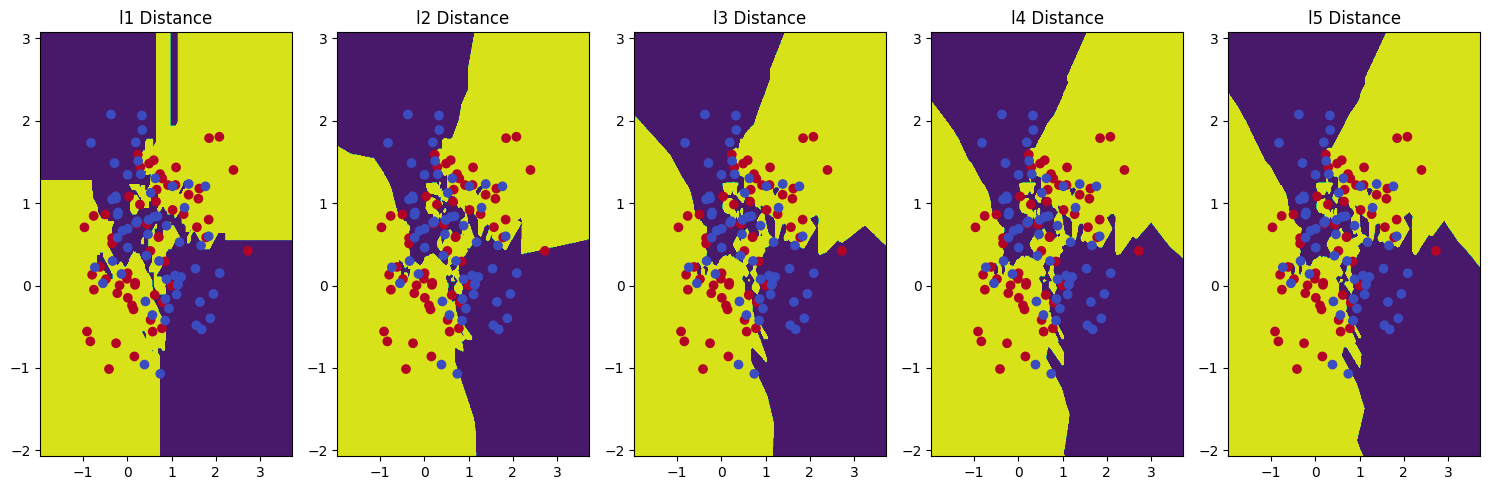

In [16]:
#################################
# Part(e): Influence of distance measure on KNN classifier
#################################
# Performance evaluation of KNN classifier with different distance measures
def kNNClassify2(X_train, Y_train, X_test, k, distance_measure):
  predictions = []
  for test_point in X_test:
      distances = []
      for i, train_point in enumerate(X_train):
          distance = np.linalg.norm(test_point - train_point,ord=distance_measure)
          distances.append((distance, Y_train[i]))
      distances.sort(key=lambda x: x[0])
      k_nearest_neighbors = distances[:k]
      labels = [neighbor[1] for neighbor in k_nearest_neighbors]
      # Get the most frequent label
      prediction = max(set(labels), key=labels.count)
      predictions.append(prediction)
  return predictions
def visualize_decision_regions_multi(X_train, Y_train, k):
    h = 0.01
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    distance_measures = [1,2,3,4,5]
    fig, axes = plt.subplots(1, len(distance_measures), figsize=(15, 5))
    for i in range(len(distance_measures)):
        Z = kNNClassify2(X_train, Y_train, np.c_[xx.ravel(), yy.ravel()], k, distance_measures[i])
        # acc=KNNAccuracy(Y_test,Z)
        # print(f"Accuracy with l{distance_measures[i]} distance is {acc:.2%}")
        Z = np.array(Z).reshape(xx.shape)
        axes[i].contourf(xx, yy, Z)
        axes[i].scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm)
        axes[i].set_title(f'l{distance_measures[i]} Distance')
    plt.tight_layout()
    plt.show()
k=int(math.sqrt(len(training))/2)
visualize_decision_regions_multi(X_train, Y_train, k)

In [ ]:
##################################
#Part(f): Influence of distance measure on KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
#Create train, validation and test splits
train = 3000
val = 1000
test = 1000
X_train = images[:train]
y_train = targets[:train]
X_val = images[train:train + val]
y_val = targets[train:train + val]
X_test = images[-test:]
y_test = targets[-test:]
#Write 'MultiClassKNNClassify' function
def MultiClassKNNClassify(X_train, Y_train, X_test, k, distance_measure='l2'):
    predictions = []
    for test_point in X_test:
        distances = []
        for i, train_point in enumerate(X_train):
            distance = np.linalg.norm(test_point - train_point, ord=1) if distance_measure == 'l1' else np.linalg.norm(test_point - train_point)
            distances.append((distance, Y_train[i]))
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = distances[:k]
        labels = [neighbor[1] for neighbor in k_nearest_neighbors]
        # Get the most frequent label
        prediction = max(set(labels), key=labels.count)
        predictions.append(prediction)
    return predictions
print("phase1")
#Empirically chose most suitable k and error function based on the evauation on cross-validation data
#Evaluate the performance using different values of 'k' on the validation data and select the optimal 'k' for the test data.
#Evaluation the performance using different distance measures (l1,l2, etc) on the validation data and select the optimal distance measure for test data.
# Empirically choose the most suitable k and distance measure based on the evaluation on cross-validation data
best_accuracy = 0
distance_measures = [1,2,3,4,5]
best_k = 0

for i in range(len(distance_measures)):
    for k in range(1, 11):  # You can adjust the range based on your preference
        Z = kNNClassify2(X_train, y_train,X_val, k, distance_measures[i])
        accuracy=KNNAccuracy(y_test,Z)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_distance_measure = i
            best_k = k

#Evaluate the performance on test data with the best hyper parameters ( k, error_func ) obtained from cross validation
print("phase2")
y_pred_test = MultiClassKNNClassify(X_train, y_train, X_test, best_k, best_distance_measure)
test_accuracy = KNNAccuracy(y_test, y_pred_test)

print("phase3")
#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    '''
    Inputs: Ground truth labels and classifier predictions
    Outputs: Confusion matrix
    '''
    # Initialize the confusion matrix with zeros
    confusion_matrix = [[0] * 10 for _ in range(10)]
    # Fill the confusion matrix
    for true_label, predicted_label in zip(true, pred):
        true_label = int(true_label)
        predicted_label = int(predicted_label)
        confusion_matrix[true_label][predicted_label] += 1
    return confusion_matrix
conf_matrix = compute_confusion_matrix(y_test, y_pred_test)
print(f"Best Distance Measure: {best_distance_measure}")
print(f"Best k: {best_k}")
print(f"Test Accuracy: {test_accuracy:.2%}")
print("Confusion Matrix:",conf_matrix)


#Suggest an alternative ways to improve performance



<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

ans. 69.5%
2. Write down the best accuracy on MNIST validation and test data.
ans. 89.6
3. Report your observations on the confusion matrix of KNN classifier on MNIST test data
ans. [[30  0  0  0  0  0  0  0  0  0]
 [ 0 40  1  0  1  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  1  0  0]
 [ 0  0  0 30  0  1  0  0  1  0]
 [ 0  1  0  0 32  0  1  0  0  0]
 [ 0  0  0  1  0 24  0  0  1  0]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  1  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0  0  0 21  1]
 [ 0  0  0  0  3  0  0  1  0 20]]
 The true labels are the predicted labels are almost matched and placed in the diogonal elements which can make us conclude that the model trained and tested well.

Note: Sir, I am in my village where the internet connectivity is unstable, so I couldn't able to run the part(e) and part(f) in the colab. I have executed in the vscode and displaying the results.Please run the part(e) part(f) code again.Sorry for the inconvience.